In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glassdoor-job-reviews/glassdoor_reviews.csv


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
df = pd.read_csv('/kaggle/input/glassdoor-job-reviews/glassdoor_reviews.csv', index_col=[0], parse_dates=['date_review']) 
df.head()

,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
firm,,,,,,,,,,,,,,,,,
AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [4]:
df.shape

(838566, 17)

In [5]:
df.columns

Index(['date_review', 'job_title', 'current', 'location', 'overall_rating',
       'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv',
       'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838566 entries, AFH-Wealth-Management to the-LEGO-Group
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   date_review          838566 non-null  datetime64[ns]
 1   job_title            838566 non-null  object        
 2   current              838566 non-null  object        
 3   location             541228 non-null  object        
 4   overall_rating       838566 non-null  int64         
 5   work_life_balance    688672 non-null  float64       
 6   culture_values       647193 non-null  float64       
 7   diversity_inclusion  136066 non-null  float64       
 8   career_opp           691065 non-null  float64       
 9   comp_benefits        688484 non-null  float64       
 10  senior_mgmt          682690 non-null  float64       
 11  recommend            838566 non-null  object        
 12  ceo_approv           838566 non-null  object     

In [7]:
df.drop_duplicates(inplace = True)
len(df)

805051

In [8]:
df.isnull().sum()

date_review                 0
job_title                   0
current                     0
location               285090
overall_rating              0
work_life_balance      144060
culture_values         183364
diversity_inclusion    674160
career_opp             141726
comp_benefits          144242
senior_mgmt            149804
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2099
pros                        0
cons                        8
dtype: int64

In [9]:
rating_columns = df.select_dtypes(include = ['float64','int64'])
string_columns = df.select_dtypes(exclude = ['float64','int64'])
df_column_sorted = pd.concat([string_columns, rating_columns], axis = 1)

df_column_sorted.head()

,date_review,job_title,current,location,recommend,ceo_approv,outlook,headline,pros,cons,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
firm,,,,,,,,,,,,,,,,,
AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",2,4.0,3.0,NaN,2.0,3.0,3.0
AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,2,3.0,1.0,NaN,2.0,1.0,4.0
AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",1,1.0,1.0,NaN,1.0,1.0,1.0
AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,5,2.0,3.0,NaN,2.0,2.0,3.0
AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",1,2.0,1.0,NaN,2.0,1.0,1.0


In [10]:
f1 = df['recommend'].value_counts()
f2 = df['ceo_approv'].value_counts()
f3 = df['outlook'].value_counts()

print(f1)
print(f2)
print(f3)

v    411103
o    224357
x    169591
Name: recommend, dtype: int64
o    298443
v    275936
r    170180
x     60492
Name: ceo_approv, dtype: int64
v    290109
o    281821
r    148915
x     84206
Name: outlook, dtype: int64


v - Positive, r - Mild, x - Negative, o - No opinion

In [11]:
for i in range(1,10):
    print('Author Years:', df['current'][i])
    print('Author Title:', df['job_title'][i])
    print('Author Summary:', df['headline'][i])
    print('Author Pro:', df['pros'][i])
    print('Author Con:', df['pros'][i])
    print('====================')

Author Years: Current Employee, more than 1 year
Author Title:  Office Administrator
Author Summary: Excellent staff, poor salary
Author Pro: Friendly, helpful and hard-working colleagues
Author Con: Friendly, helpful and hard-working colleagues
Author Years: Current Employee, less than 1 year
Author Title:  Office Administrator
Author Summary: Low salary, bad micromanagement
Author Pro: Easy to get the job even without experience in finance
Author Con: Easy to get the job even without experience in finance
Author Years: Current Employee
Author Title:  
Author Summary: Over promised under delivered
Author Pro: Nice staff to work with
Author Con: Nice staff to work with
Author Years: Current Employee, more than 1 year
Author Title:  Office Administrator
Author Summary: client reporting admin
Author Pro: Easy to get the job, Nice colleagues.
Author Con: Easy to get the job, Nice colleagues.
Author Years: Current Employee, less than 1 year
Author Title:  Office Administrator
Author Summar

In [12]:
type(pd.isna(df['current']))

pandas.core.series.Series

In [13]:
def extract_cat_data(row):
    
    # 1. extract current/former employee flags from'Author Years'
    if not pd.isna(row['current']):
        if "Current Employee" in row['current']:
            row['Current Employee'] = 1
        elif "Former Employee" in row['current']:
            row['Current Employee'] = 0
        elif "Former Intern" in row['current']:
            row['Current Employee'] = 0
        elif "Current Contractor" in row['current']:
            row['Current Employee'] = 0
        elif "KEY NOT FOUND" in row['current']:
            row['Current Employee'] = 0
        else:
            row['Current Employee'] = np.NaN  
    
    str_to_num = row['current'].replace("a year" , "1 year")
    regrex = r'\d+'
    tenure = re.findall(regrex , str_to_num)
    
    if tenure:
        row['tenure'] = int(tenure[0])
        if "more than" in row['current']:
            row['tenure'] += 0.5
        elif "less than" in row['current']:
            row['tenure'] -=0.5
    else:
        row['tenure'] = np.NaN
            
    
    if not pd.isna(row['recommend']):
        if row['recommend'] == "v":
            row['recommend'] = 1
        elif row['recommend'] == "x":
            row['recommend'] = -1
        elif row['recommend'] == "o" or row['recommend'] == "r":
            row['recommend'] = 0
       
    
    if not pd.isna(row['ceo_approv']):
        if row['ceo_approv'] == "v":
            row['ceo_approv'] = 1
        elif row['ceo_approv'] == "x":
            row['ceo_approv'] = -1
        elif row['ceo_approv'] == "o" or row['ceo_approv'] == "r":
            row['ceo_approv'] = 0
            
    
    if not pd.isna(row['outlook']):
        if row['outlook'] == "v":
            row['outlook'] = 1
        elif row['outlook'] == "x":
            row['outlook'] = -1
        elif row['outlook'] == "o" or row['outlook'] == "r":
            row['outlook'] = 0
            
    

    return row

df_cat_extracted = df.apply(extract_cat_data, axis=1)
df_cat_extracted

,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons,Current Employee,tenure
firm,,,,,,,,,,,,,,,,,,,
AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,-1,0,0,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication.",1.0,NaN
AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,-1,0,0,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...,1.0,1.5
AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,-1,0,-1,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very...",1.0,0.5
AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,-1,0,0,Over promised under delivered,Nice staff to work with,No career progression and salary is poor,1.0,NaN
AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,-1,0,-1,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr...",1.0,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
the-LEGO-Group,2021-06-02,Marketing Manager,"Current Employee, more than 5 years","München, Bavaria, Bavaria",5,4.0,5.0,4.0,4.0,4.0,4.0,1,1,1,Just an awesome company to work for!!!,"Great company values, awesome product, smart c...",Not very easy to transfer to other locations,1.0,5.5
the-LEGO-Group,2021-06-03,Sales Associate,"Current Employee, less than 1 year","London, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,working at lego,staff discount is really nice,micro managing is a hassle\r\ncan become menta...,1.0,0.5
the-LEGO-Group,2021-06-03,Strategist,Current Employee,NaN,4,5.0,5.0,5.0,3.0,5.0,3.0,1,0,0,not interested in growing their people,loved brand for a lot of people,you can spend 6-10 years without any promotion...,1.0,NaN


In [31]:
df_cleaned = df_cat_extracted.drop(columns = ['current'])


**Reorder for a Better View**

In [15]:
df_cleaned = df_cleaned[['date_review', 'location', 'job_title', 'tenure', 'Current Employee', 
       'headline', 'pros', 'cons', 'recommend', 'ceo_approv','outlook', 'overall_rating',
       'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt']]

In [16]:
df_cleaned.set_index('date_review' , inplace = True)

In [17]:
df_cleaned = df_cleaned.sort_index()
df_cleaned.head(10)

,location,job_title,tenure,Current Employee,headline,pros,cons,recommend,ceo_approv,outlook,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
date_review,,,,,,,,,,,,,,,,,
2008-01-31,"Cupertino, CA",Senior Product Manager,NaN,1.0,We make products that poeple enjoy buying and ...,The people we work with are great and I can't ...,You have to be careful because this job can ta...,1,1,0,5,3.0,NaN,NaN,3.0,4.0,4.0
2008-02-05,"Mountain View, CA",Software Engineer,NaN,1.0,Freedom within the company and lots of things ...,I work w/ a diverse set of people. You have ha...,Google can be a bit overwhelming w/ the volume...,1,1,0,4,4.0,NaN,NaN,4.0,4.0,4.0
2008-02-11,"Mountain View, CA",Software Engineer,NaN,1.0,Work with smart people who are willing to shar...,People are willing to share knowledge which is...,A company like this requires a lot of long hou...,1,1,0,5,4.0,NaN,NaN,5.0,5.0,5.0
2008-02-14,"Cupertino, CA",Software Engineer,NaN,1.0,It is a different job because of all of the di...,The big positive for me is that I really do en...,I suppose that a con would be that there is a ...,1,1,0,4,4.0,NaN,NaN,3.0,4.0,3.0
2008-02-14,"Mountain View, CA",Software Engineer,NaN,1.0,One of the best jobs of my life because I work...,"To repeat what I wrote before, the people I wo...",Sometimes being that it is such a big company ...,1,1,0,5,5.0,NaN,NaN,4.0,4.0,5.0
2008-02-14,"Mountain View, CA",Software Engineer,NaN,1.0,Working for Google has been exciting over the ...,The name recognition that goes along w/ the jo...,It is very difficult to know where management ...,0,1,0,3,4.0,NaN,NaN,3.0,4.0,4.0
2008-02-15,"Cupertino, CA",Product Manager,NaN,1.0,Working at Apple is the hardest job you will e...,When you work at a place like Apple you have a...,The people at Apple are living on the bleeding...,1,1,0,5,4.0,NaN,NaN,5.0,5.0,5.0
2008-02-25,"Mountain View, CA",Project Manager,NaN,1.0,Dynamic place to work due to diverse cultures.,The variety of different projects and the spee...,Sometimes people need to realize when we work ...,1,1,0,5,5.0,NaN,NaN,5.0,5.0,5.0
2008-02-27,"San Francisco, CA",Technical Account Manager,NaN,1.0,Growing company that is supportive with a lot ...,A positive is that they do a really good job t...,I would say that I was rather impressed becaus...,1,1,0,5,5.0,NaN,NaN,5.0,5.0,5.0


In [18]:
df_cleaned.isnull().sum()

location               285090
job_title                   0
tenure                 341342
Current Employee           13
headline                 2099
pros                        0
cons                        8
recommend                   0
ceo_approv                  0
outlook                     0
overall_rating              0
work_life_balance      144060
culture_values         183364
diversity_inclusion    674160
career_opp             141726
comp_benefits          144242
senior_mgmt            149804
dtype: int64

**Data Analysis**

In [19]:
df_cleaned.describe()

,tenure,Current Employee,recommend,ceo_approv,outlook,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt
count,463709.000000,805038.000000,805051.000000,805051.000000,805051.000000,805051.000000,660991.000000,621687.000000,130891.000000,663325.000000,660809.000000,655247.000000
mean,3.447672,0.585287,0.299996,0.267615,0.255764,3.656927,3.374736,3.590585,3.964245,3.458933,3.402215,3.178473
std,3.003044,0.492673,0.794554,0.588455,0.632094,1.177071,1.306846,1.325257,1.193159,1.274151,1.220950,1.332946
min,0.500000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.500000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,3.500000,1.000000,1.000000,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,5.500000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000
max,10.500000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**BOX-PLOT**

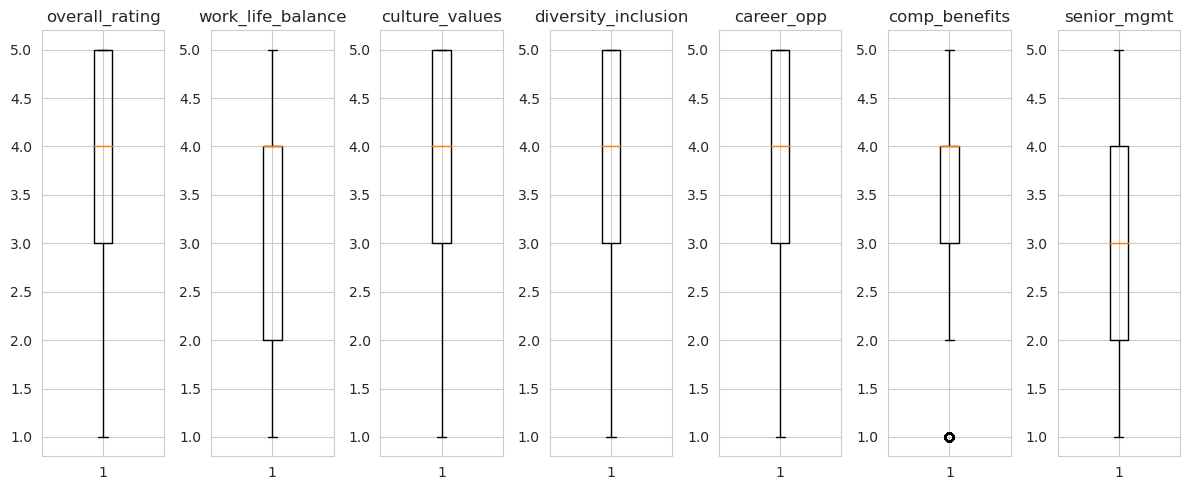

In [20]:
columns = ['overall_rating', 'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt']

fig,ax = plt.subplots(1,7,figsize=(12,5))

for column,curr_ax in zip(columns,ax.ravel()):
    curr_ax.boxplot(df_cleaned[column].dropna())
    curr_ax.set_title(f'{column}')
    
plt.tight_layout()
plt.show()

On a scale of 1-5, this company's median overall rating is 4 which is pretty good. Breaking down to 6 categories, employees rated the highest in worklife-balance, diversity inclusion , carrer opportunities and company benefitis. Senior management rating's median value is 3, which is the lowest. Culture Values has a median rating as 4. There are a few outliers in career opportunities and culture values.

**LINEPLOT OF OVERALL RATINGS**

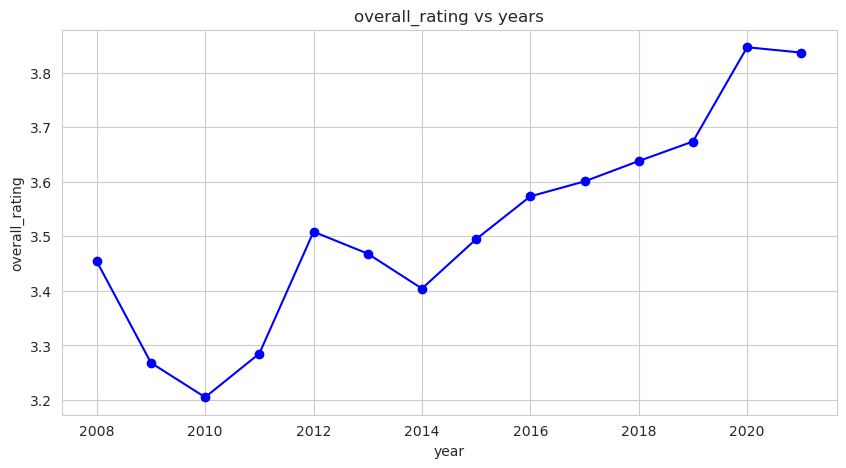

In [21]:
from datetime import datetime

fig,ax = plt.subplots(figsize = (10,5))

x = sorted(df_cleaned.index.year.unique())
y = df_cleaned.groupby(df_cleaned.index.year)['overall_rating'].mean()

ax.plot(x,y,color = 'blue' , marker = 'o' , label = 'overall_rating')
ax.set_title('overall_rating vs years')
ax.set_ylabel('overall_rating')
ax.set_xlabel('year')

plt.show()

There is a clear trend that the employee satisfaction has been increasing since 2010 with a some small dip in 2013 and 2014.we can also see a large decrease in employee satisfaction from 2008 to 2010 .

**Bar plot of overall recommendations**

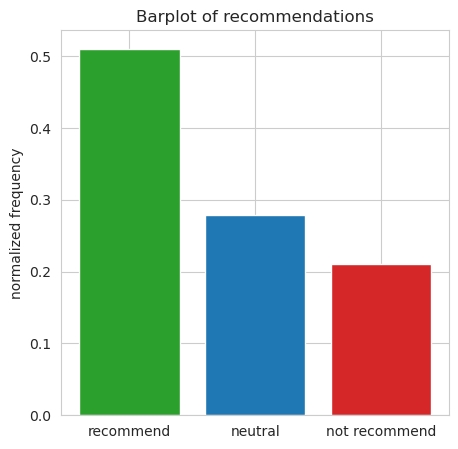

In [22]:
count = df_cleaned['recommend'].value_counts(normalize = True)

fig,ax = plt.subplots(figsize = (5,5))

ax.bar(['recommend' , 'neutral' , 'not recommend'] , count, color = ['tab:green','tab:blue','tab:red'])
ax.set_title('Barplot of recommendations')
ax.set_ylabel('normalized frequency')

plt.show()

Overall, 50% of employees recommend this company, 20% do not recommend it, another 30% is neutral.

**Bar plots of sub-categories' ratings**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


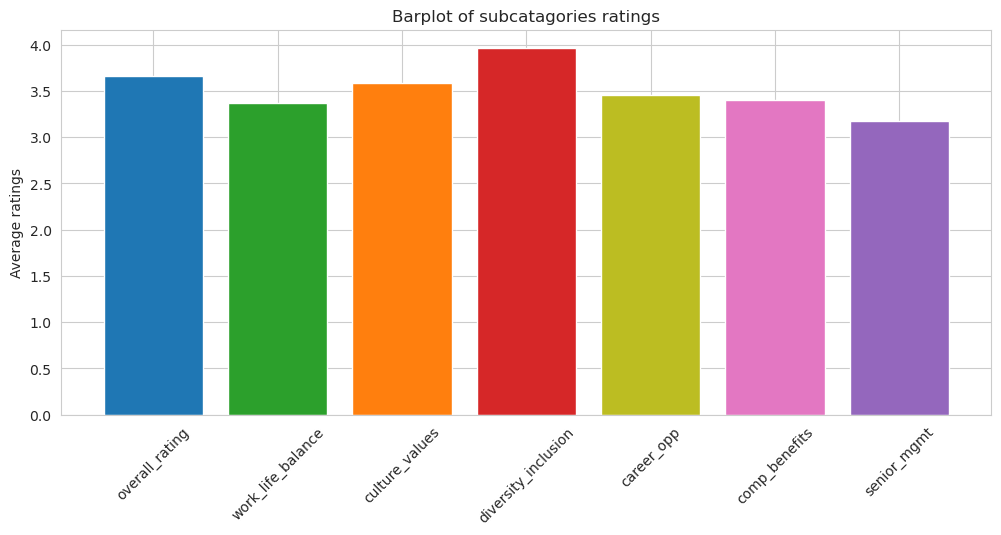

In [23]:
columns = ['overall_rating', 'work_life_balance', 'culture_values', 'diversity_inclusion',
       'career_opp', 'comp_benefits', 'senior_mgmt']

sub_count = df_cleaned[columns].mean()

fig,ax = plt.subplots(figsize = (12,5))
color1 = ['tab:blue' , 'tab:green','tab:orange','tab:red' , 'tab:olive','tab:pink','tab:purple']
ax.bar(columns , sub_count  , color = color1)
ax.set_title('Barplot of subcatagories ratings')
ax.set_ylabel('Average ratings')
ax.set_xticklabels(columns , rotation = 45)

plt.show()

**BARPLOT OF TOP 10 HIGHEST and LOWEST RATED LOCATION**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


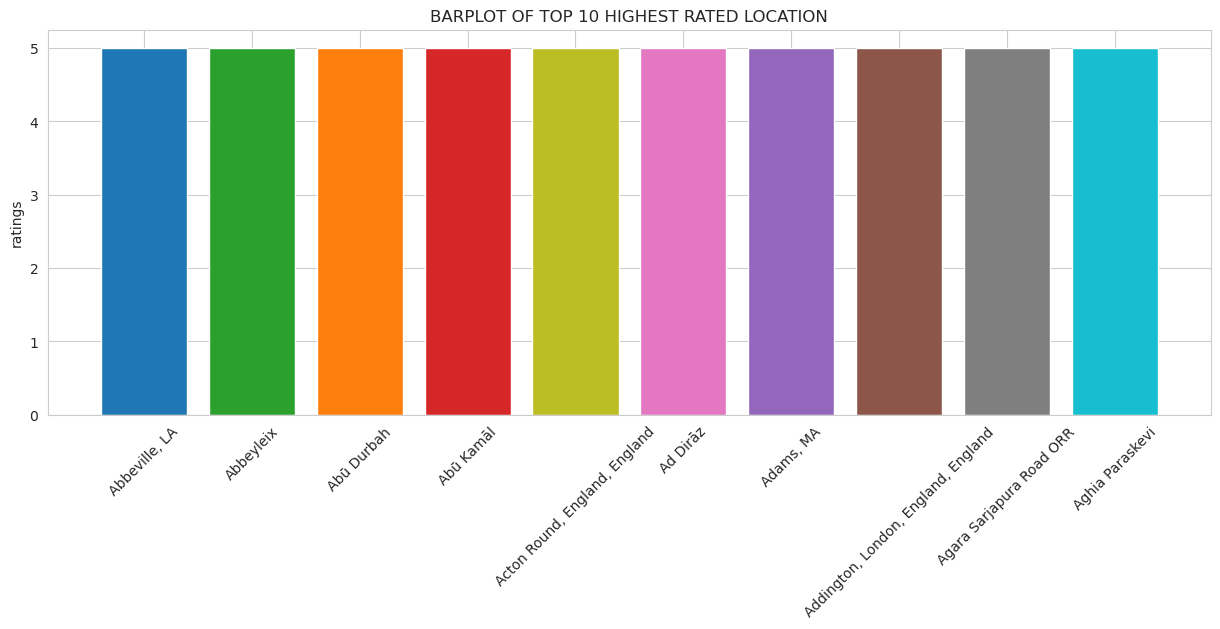

In [24]:
top10 = df_cleaned.groupby('location')['overall_rating'].mean().nlargest(10)
color2 = ['tab:blue' , 'tab:green','tab:orange','tab:red' , 'tab:olive','tab:pink',
          'tab:purple' , 'tab:brown','tab:gray','tab:cyan']

fig,ax = plt.subplots(figsize = (15,5))

ax.bar(top10.index , top10 , color = color2)
ax.set_title('BARPLOT OF TOP 10 HIGHEST RATED LOCATION')
ax.set_ylabel('ratings')
ax.set_xticklabels(top10.index , rotation = 45)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


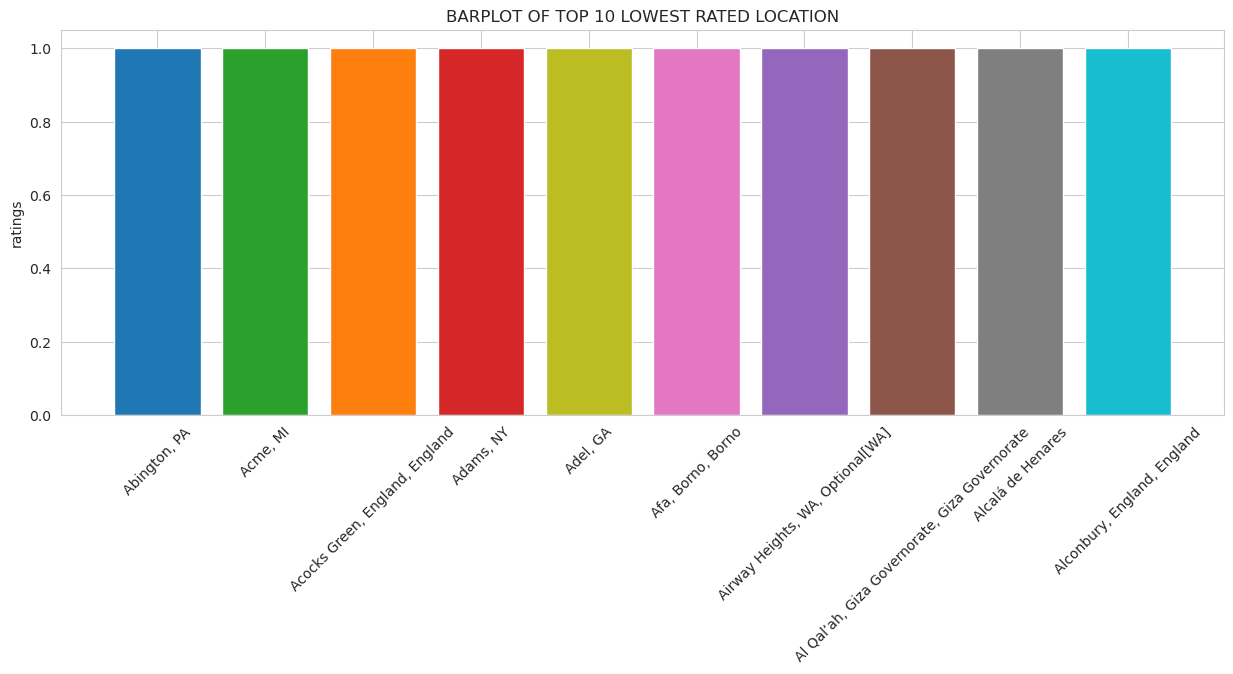

In [25]:
low10 = df_cleaned.groupby('location')['overall_rating'].mean().nsmallest(10)
color2 = ['tab:blue' , 'tab:green','tab:orange','tab:red' , 'tab:olive','tab:pink',
          'tab:purple' , 'tab:brown','tab:gray','tab:cyan']

fig,ax = plt.subplots(figsize = (15,5))

ax.bar(low10.index , low10 , color = color2)
ax.set_title('BARPLOT OF TOP 10 LOWEST RATED LOCATION')
ax.set_ylabel('ratings')
ax.set_xticklabels(low10.index , rotation = 45)
plt.show()

**Bar plots of overall ratings by employee type**

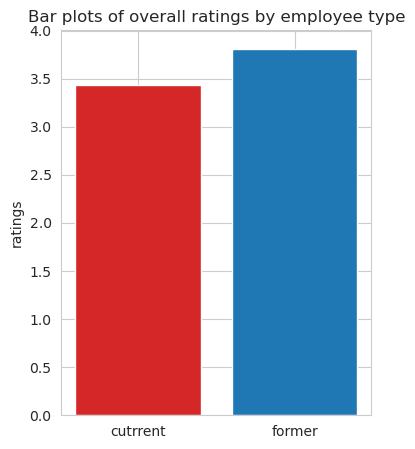

In [26]:
div_count = df_cleaned.groupby('Current Employee')['overall_rating'].mean()

fig,ax = plt.subplots(figsize = (4,5))

ax.bar(['cutrrent' , 'former']  ,div_count , color = ['tab:red' , 'tab:blue'])
ax.set_title('Bar plots of overall ratings by employee type')
ax.set_ylabel('ratings')

plt.show()

**Bar plots of most frequent reviewer job titles**

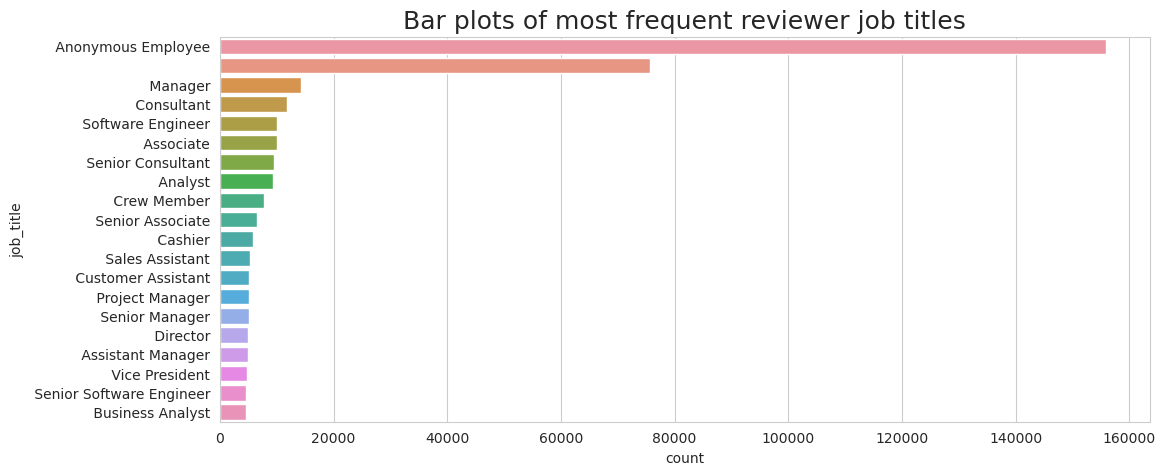

In [27]:
top20 = df_cleaned['job_title'].value_counts().nlargest(20)

plt.figure(figsize = (12,5))
sns.countplot(y = 'job_title' , data = df_cleaned , order = top20.index)
sns.set_context('talk')
plt.title('Bar plots of most frequent reviewer job titles')

plt.show()

Most employees choose not to disclose their job titles, for those who disclose their titles, they are manager and consultant.

**Bar plots of overall ratings of top jobs**

In [28]:
review = df_cleaned.loc[df_cleaned['job_title'].isin(top20.index) , ['job_title'  , 'overall_rating']]

mean_review = review.groupby('job_title')['overall_rating'].mean().sort_values(ascending = False)
mean_review

job_title
 Software Engineer           3.945390
 Business Analyst            3.788347
 Senior Manager              3.775753
 Senior Software Engineer    3.765186
 Analyst                     3.748873
 Consultant                  3.745111
 Associate                   3.741278
 Senior Associate            3.697789
 Senior Consultant           3.691438
 Director                    3.691059
 Assistant Manager           3.685386
 Customer Assistant          3.679674
 Manager                     3.668986
 Project Manager             3.633274
 Anonymous Employee          3.629527
 Vice President              3.555556
                             3.554590
 Sales Assistant             3.422050
 Cashier                     3.398589
 Crew Member                 3.169777
Name: overall_rating, dtype: float64

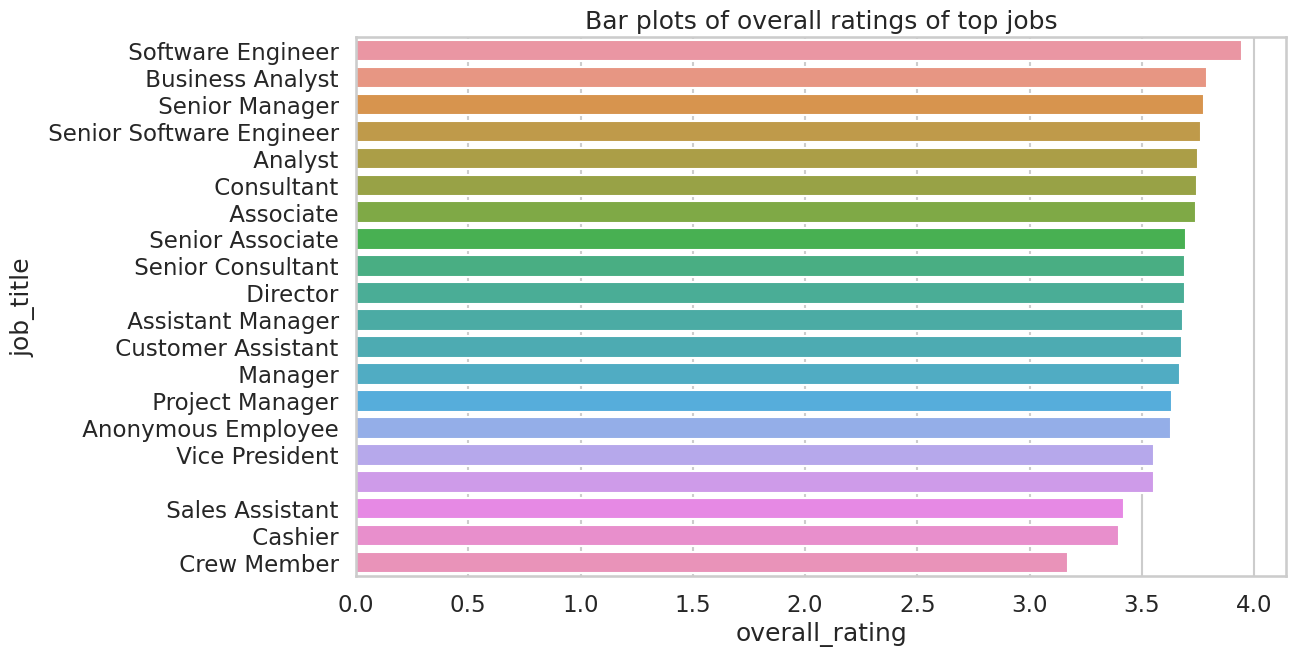

In [29]:
plt.figure(figsize = (12,7))

sns.barplot(y =mean_review.index , x = mean_review , hue_order = mean_review)
sns.set_context('talk')
plt.title('Bar plots of overall ratings of top jobs')

plt.show()

Among the top most frequent job titles, Crew Member group has the lowest satisfaction and software Engineer give the highest ratings.

In [30]:
df_cleaned.to_csv('/kaggle/working/df_cleaned1.csv')